In [2]:
# import necessary packages required for this project. 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Set working directory
import os
os.chdir("E:\data_science")


In [4]:
#Load data
train = pd.read_csv("train_cab.csv")
test = pd.read_csv("test.csv")

In [5]:
# PART 1 --> DATA CLEANSING & EXPLORATORY DATA ANALYSIS (EDA)

 # Will perform the following activities

#Shape of train and test sets
#Check for NaNs and drop them (if any)
#Check for outliers and drop them (if any)
#Type conversion of relevant fields

In [6]:
train.shape

(16067, 7)

In [7]:
train.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [8]:
train.describe()

C:\Users\Asus\Anaconda4\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,NaN
50%,-73.981698,40.752603,-73.980172,40.753567,NaN
75%,-73.966838,40.767381,-73.963643,40.768013,NaN
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [9]:
#check for missing values in train data
train.isnull().sum().sort_values(ascending=False)

passenger_count      55
fare_amount          24
dropoff_latitude      0
dropoff_longitude     0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
dtype: int64

In [10]:
#check for missing values in test data
test.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
dtype: int64

In [11]:
#drop the missing values
train = train.drop(train[train.isnull().any(1)].index, axis = 0)

In [12]:
train.shape

(15988, 7)

In [13]:
#check the target column
train['fare_amount'].describe()

count     15988
unique      467
top         6.5
freq        757
Name: fare_amount, dtype: object

In [14]:
# Here fare_amount type is object so we need to change into float 

train['fare_amount'] = pd.to_numeric(train['fare_amount'],errors='coerce') 

In [15]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [16]:
# Fare amount has negative value, so we need to Remove those fields

In [17]:
from collections import Counter
Counter(train['fare_amount']<0) 


Counter({False: 15985, True: 3})

In [18]:
train = train.drop(train[train['fare_amount']<0].index, axis=0)
train.shape 

(15985, 7)

In [19]:
#highest fare is $54343
train['fare_amount'].sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
6630       128.83
14142      108.00
12349      104.67
12915       96.00
7810        95.00
9431        88.00
10077       87.30
12614       87.00
4620        85.50
14519       82.50
12437       80.75
2639        79.00
4013        77.70
13962       77.15
2013        77.00
6668        76.80
8363        76.00
10524       75.80
11019       75.33
13615       75.00
15023       73.30
1494        70.00
4118        69.70
649         66.30
           ...   
10111        2.50
958          2.50
3168         2.50
13221        2.50
8916         2.50
1774         2.50
3558         2.50
6632         2.50
472          2.50
8680         2.50
12343        2.50
9621         2.50
376          2.50
6765         2.50
8711         2.50
12567        2.50
14530        2.50
15370        2.50
13877        2.50
15257        2.50
6703         2.50
8263         2.50
922          2.50
4367         2.50
4954      

In [20]:
# Next check the passenger_count variable

In [21]:
train['passenger_count'].describe()

count    15985.000000
mean         2.623185
std         60.894044
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [22]:
#max is 5345 passengers. Assuming that a bus is a 'taxi' in city, I don't think a bus can carry 5345 passengers! Let' see the distribution of this field
# this is DEFINITELY an outlier. Lets drop it 
train[train['passenger_count']>6] 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
233,8.5,2011-07-24 01:14:35 UTC,0.000000,0.000000,0.000000,0.000000,236.0
263,4.9,2010-07-12 09:44:33 UTC,-73.983249,40.734655,-73.991278,40.738918,456.0
293,6.1,2011-01-18 23:48:00 UTC,-74.006642,40.738927,-74.010828,40.717907,5334.0
356,8.5,2013-06-18 10:27:05 UTC,-73.992108,40.764203,-73.973000,40.762695,535.0
386,8.1,2009-08-21 19:35:05 UTC,-73.960853,40.761557,-73.976335,40.748361,354.0
971,10.1,2010-11-21 01:41:00 UTC,-74.004500,40.742143,-73.994330,40.720412,554.0
1007,3.7,2010-12-14 14:46:00 UTC,-73.969157,40.759000,-73.968763,40.764617,53.0
1043,5.7,2012-08-22 22:08:29 UTC,-73.973573,40.760184,-73.953564,40.767392,35.0
1107,4.9,2009-08-08 21:50:50 UTC,-73.988977,40.721068,-73.982368,40.732064,345.0
1146,8.0,2014-03-27 08:05:01 UTC,-73.991098,40.770655,-73.976933,40.790070,5345.0


In [23]:
train = train.drop(train[train['passenger_count']>6].index, axis = 0) 

In [24]:
#much neater now! Max number of passengers are 6. Which makes sense is the cab is an SUV :)
train['passenger_count'].describe() 

count    15966.000000
mean         1.643456
std          1.267245
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [25]:
#Next, let us explore the pickup latitude and longitudes
train['pickup_latitude'].describe() 

count    15966.000000
mean        39.919648
std          6.818627
min        -74.006893
25%         40.734936
50%         40.752620
75%         40.767381
max        401.083332
Name: pickup_latitude, dtype: float64

In [26]:
# Quick Googling gave me this info

#Latitudes range from -90 to 90.
#Longitudes range from -180 to 180.
#The above describe clearly shows some outliers. Let's filter them

In [27]:
train[train['pickup_latitude']<-90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [28]:
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1.0


In [29]:
#We need to drop these outliers
train = train.drop(((train[train['pickup_latitude']<-90])|(train[train['pickup_latitude']>90])).index, axis=0)

In [30]:
train.shape

(15965, 7)

In [31]:
#similar operation for pickup longitude
train['pickup_longitude'].describe()

count    15965.000000
mean       -72.471636
std         10.549281
min        -74.438233
25%        -73.992145
50%        -73.981693
75%        -73.966832
max         40.766125
Name: pickup_longitude, dtype: float64

In [32]:
train[train['pickup_longitude']<-180] 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [33]:
train[train['pickup_longitude']>180]
# there is no outliers found so we don't need to remove any field 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [34]:
train[train['dropoff_latitude']<-180]|train[train['dropoff_latitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [35]:
# Check the data types of each column
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [36]:
# pickup_datetime seem to be datetime columns which are in object format. Let's convert them to datetime.

In [37]:
#Convert for test data
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [38]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [39]:
#Convert for train data
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'],errors='coerce')  

In [40]:
train.dtypes 

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [41]:
#check the data
train.head() 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [42]:
# now we need to change passenger_count data type into integer becoues passenger not count in float. 
 
train['passenger_count'] = train['passenger_count'].astype(int)  

In [43]:
train.head() 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [44]:
# Now, for EDA. The following are my considerations -

#Does the number of passengers affect the fare?
#Does the date and time of pickup affect the fare?
#Does the day of the week affect the fare?
#Does the distance travelled affect the fare?
#First, let's split the datetime field 'pickup_datetime' to the following -

#year
#month
#date
#hour
#day of week
#Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare. Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

In [45]:
#We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula

#haversine(θ) = sin²(θ/2)

#Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

#a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

#c = 2 * atan2( √a, √(1−a) )

#d = R ⋅ c 

#d = Haversine distance

In [46]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d 

In [47]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude') 

0        2.323259
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081664
9898     0.555287
9899     5.610505
9900     1.890608
9901     1.530118
9902     3.891526
9903     2.299316
9904    15.091262
9905     9.613798
9906     0.369506
9907     9.923998
9908     1

In [48]:
train['H_Distance'].head(10) 

0     1.030764
1     8.450134
2     1.389525
3     2.799270
4     1.999157
5     3.787239
6     1.555807
7     4.155444
9     2.849627
10    1.374577
Name: H_Distance, dtype: float64

In [49]:
test['H_Distance'].head(10) 

0     2.323259
1     2.425353
2     0.618628
3     1.961033
4     5.387301
5     3.222549
6     0.929601
7    21.540102
8     3.873962
9     1.099794
Name: H_Distance, dtype: float64

In [50]:
train.head(10) 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
5,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,3.787239
6,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,1.555807
7,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,4.155444
9,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2.849627
10,5.3,2012-04-08 07:30:50,-73.996335,40.737142,-73.980721,40.733559,1,1.374577


In [51]:
test.head(10) 

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301
5,2012-12-01 21:12:12,-73.960983,40.765547,-73.979177,40.740053,1,3.222549
6,2011-10-06 12:10:20,-73.949013,40.773204,-73.959622,40.770893,1,0.929601
7,2011-10-06 12:10:20,-73.777282,40.646636,-73.985083,40.759368,1,21.540102
8,2011-10-06 12:10:20,-74.014099,40.709638,-73.995106,40.741365,1,3.873962
9,2014-02-18 15:22:20,-73.969582,40.765519,-73.980686,40.770725,1,1.099794


In [52]:
#Now that we have calculated the distance, we shall create columns for the following -

#year
#month
#date
#hour
#day of week

In [53]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour 

In [54]:
train.head()   

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009.0,6.0,15.0,0.0,17.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010.0,1.0,5.0,1.0,16.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011.0,8.0,18.0,3.0,0.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012.0,4.0,21.0,5.0,4.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010.0,3.0,9.0,1.0,7.0


In [55]:
# Since,  year, month, date, day of week, hour are in float so we can change into integer.

train = train.dropna(subset=['Year']) 
train = train.dropna(subset=['Month']) 
train = train.dropna(subset=['Date']) 
train = train.dropna(subset=['Day of Week']) 
train = train.dropna(subset=['Hour']) 

In [56]:
train['Year'] = train['Year'].astype(int) 
train['Month'] = train['Month'].astype(int) 
train['Date'] = train['Date'].astype(int) 
train['Day of Week'] = train['Day of Week'].astype(int) 
train['Hour'] = train['Hour'].astype(int) 

In [208]:
train.describe() 

C:\Users\Asus\Anaconda4\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
count,15505.000000,15506.000000,15506.000000,15506.000000,15506.000000,15506.000000,15506.000000,15506.000000,15506.000000,15506.000000,15506.000000,15506.000000
mean,15.155256,-73.858740,40.660017,-73.863048,40.668455,1.645299,3.449834,2011.738295,6.268025,15.675932,3.035148,13.505611
std,437.844058,3.318707,2.840978,3.254301,2.783097,1.268809,4.607310,1.868008,3.447642,8.685425,1.969582,6.507367
min,0.010000,-74.438233,-74.006893,-74.227047,-74.006377,0.000000,0.000111,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,-73.992372,40.736522,-73.991369,40.736260,1.000000,1.278443,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,NaN,-73.982049,40.753300,-73.980567,40.754232,1.000000,2.194728,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,NaN,-73.968126,40.767798,-73.965453,40.768311,2.000000,3.941087,2013.000000,9.000000,23.000000,5.000000,19.000000
max,54343.000000,40.766125,41.366138,40.802437,41.366138,6.000000,129.950482,2015.000000,12.000000,31.000000,6.000000,23.000000


In [207]:
train.dropna() 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030764,2009.0,6.0,15.0,0.0,17.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450134,2010.0,1.0,5.0,1.0,16.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389525,2011.0,8.0,18.0,3.0,0.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799270,2012.0,4.0,21.0,5.0,4.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999157,2010.0,3.0,9.0,1.0,7.0
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1.0,3.787239,2011.0,1.0,6.0,3.0,9.0
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1.0,1.555807,2012.0,11.0,20.0,1.0,20.0
7,16.5,-73.951300,40.774138,-73.990095,40.751048,1.0,4.155444,2012.0,1.0,4.0,2.0,17.0
9,8.9,-73.980658,40.733873,-73.991540,40.758138,2.0,2.849627,2009.0,9.0,2.0,2.0,1.0
10,5.3,-73.996335,40.737142,-73.980721,40.733559,1.0,1.374577,2012.0,4.0,8.0,6.0,7.0


In [58]:
test.head() 

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323259,2015,1,27,1,13
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21


In [59]:
 # 1. Does the number of passengers affect the fare? 

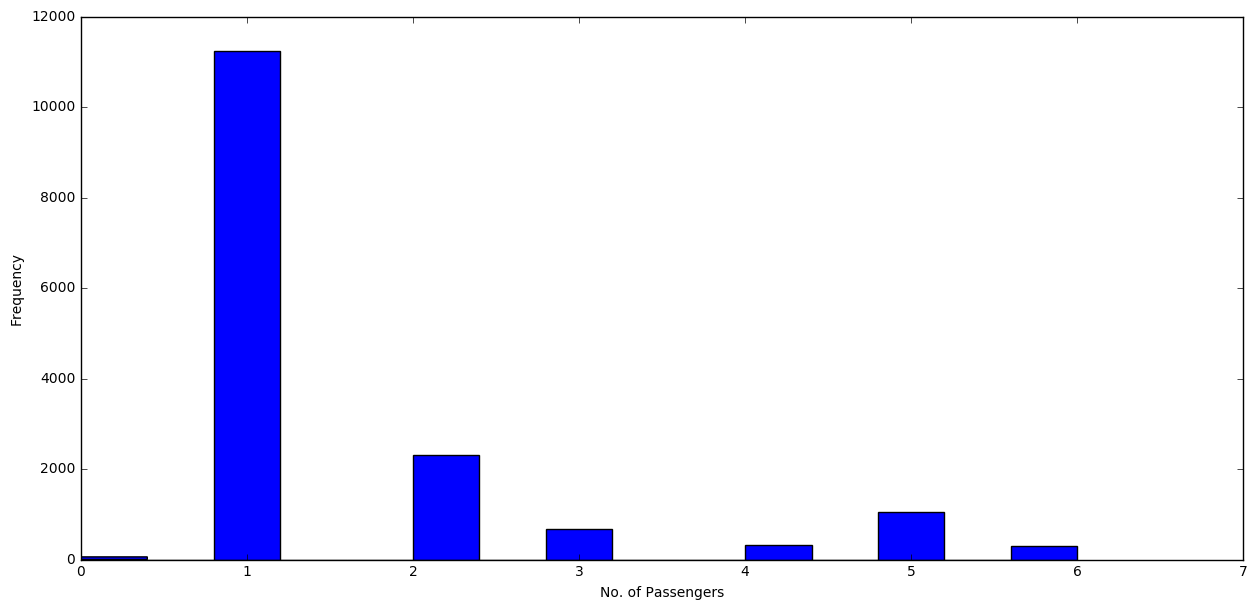

In [60]:
plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency') 
plt.show() 

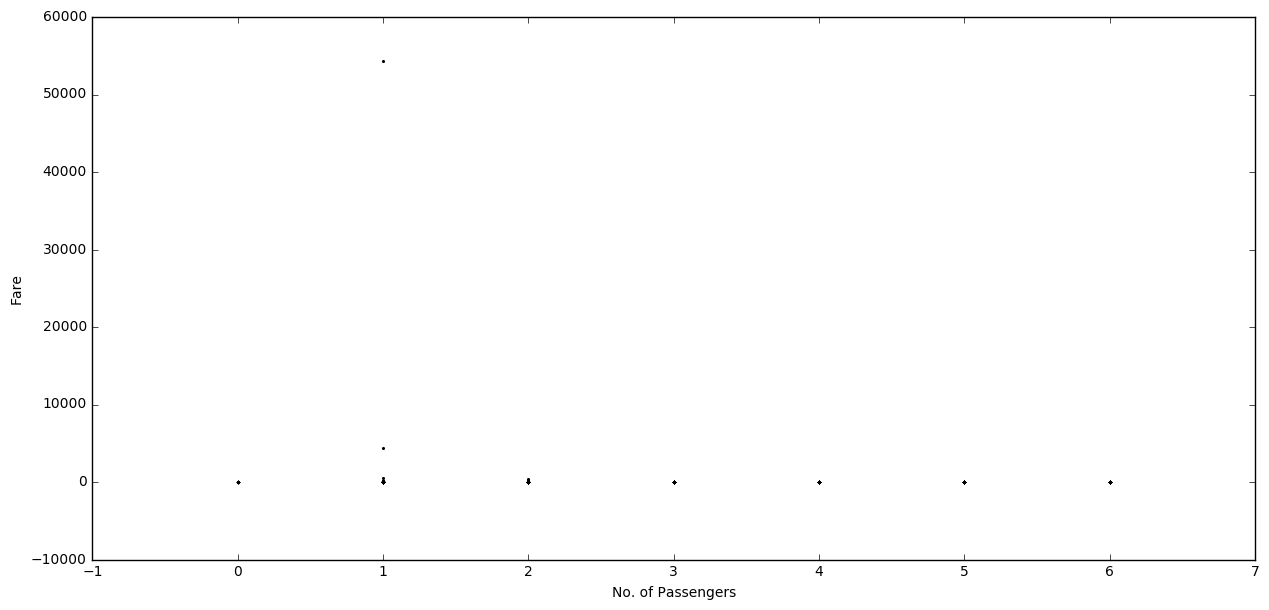

In [61]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare') 
plt.show() 

In [62]:
# From the above 2 graphs we can see that single passengers are the most frequent travellers, and the highest fare also seems to come from cabs which carry just 1 passenger.

In [63]:
# 2. Does the date and time of pickup affect the fare?

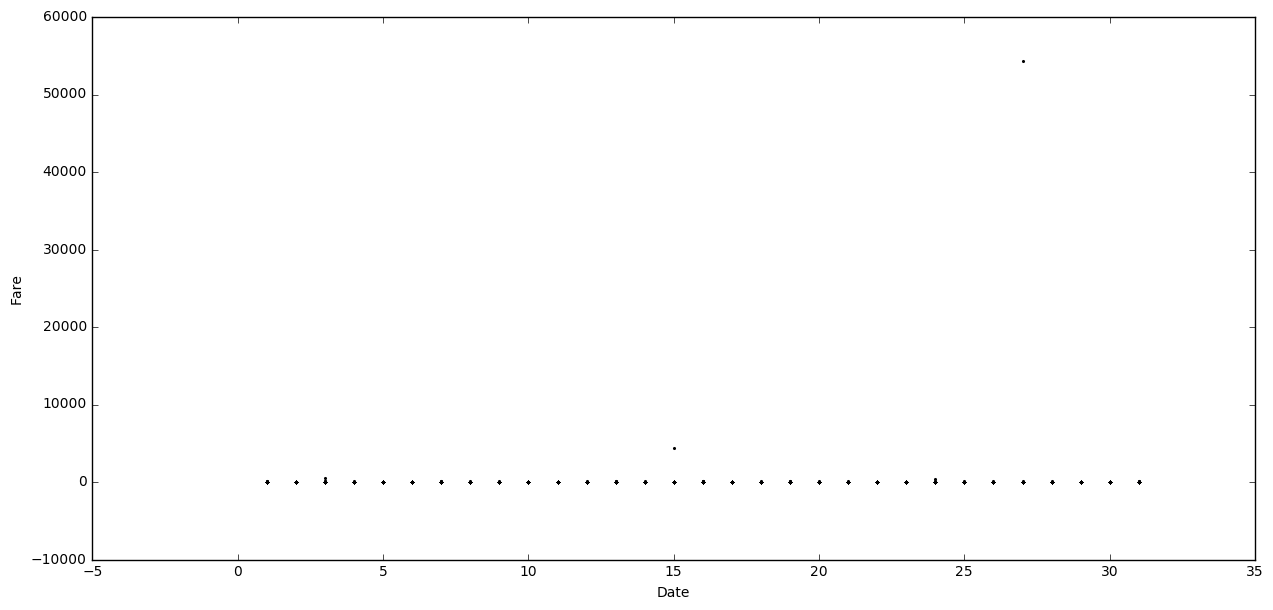

In [64]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare') 
plt.show()

In [65]:
#The fares throught the month mostly seem uniform, with the maximum fare received on the 15th as shown in above scatter plot 

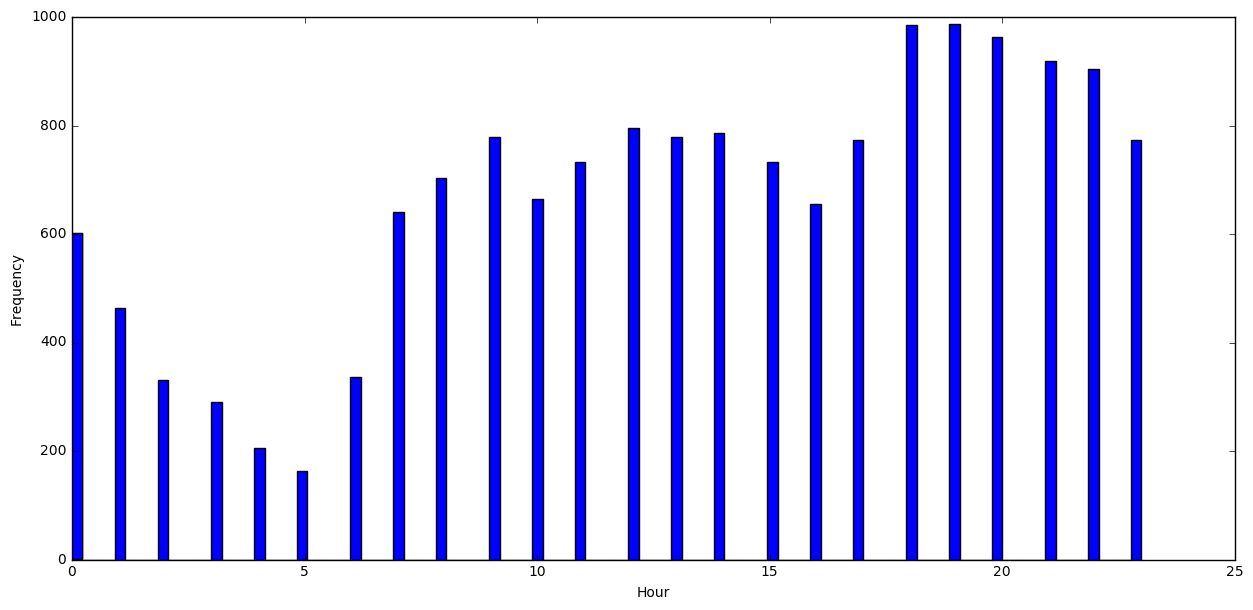

In [66]:
plt.figure(figsize=(15,7))
plt.hist(train['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

In [67]:
# Interesting! In the above graph shows that the time of day definitely plays an important role. The frequency of cab rides seem to be the lowest at 5AM and the highest at 8PM.

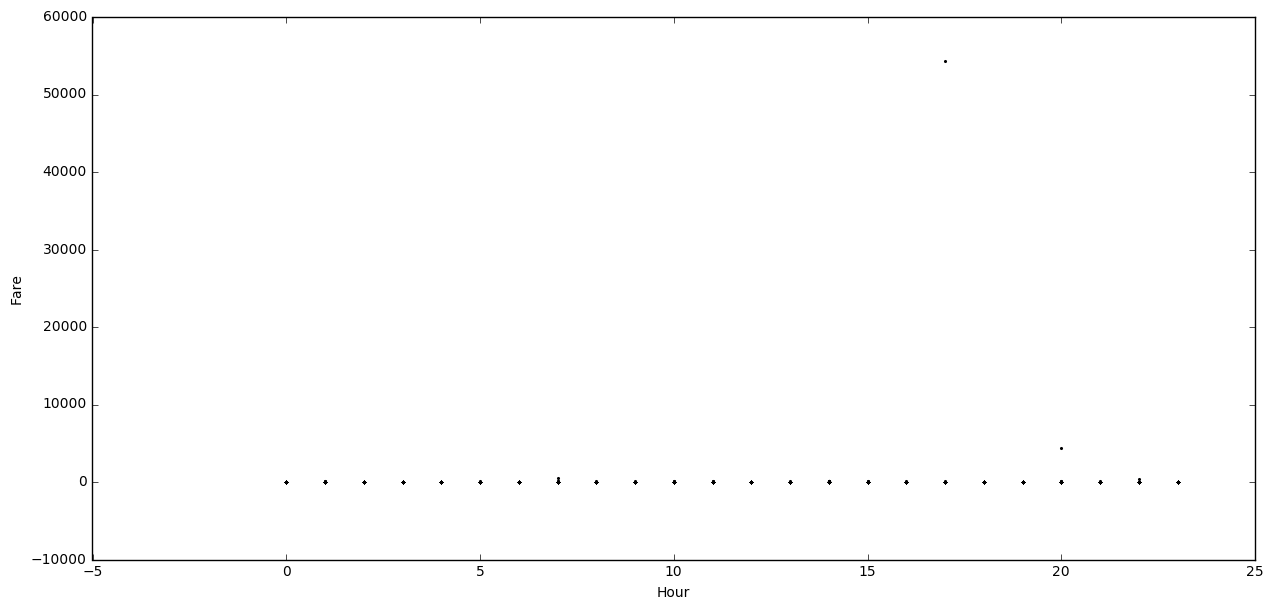

In [68]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare') 
plt.show() 

In [69]:
# From the above graph shows that the fare is high between 3 pm to 8 pm. May be people came to home from office and the people going for travlling, attend parties, functions, marketing etc.

In [70]:
# 3. Does the day of the week affect the fare?

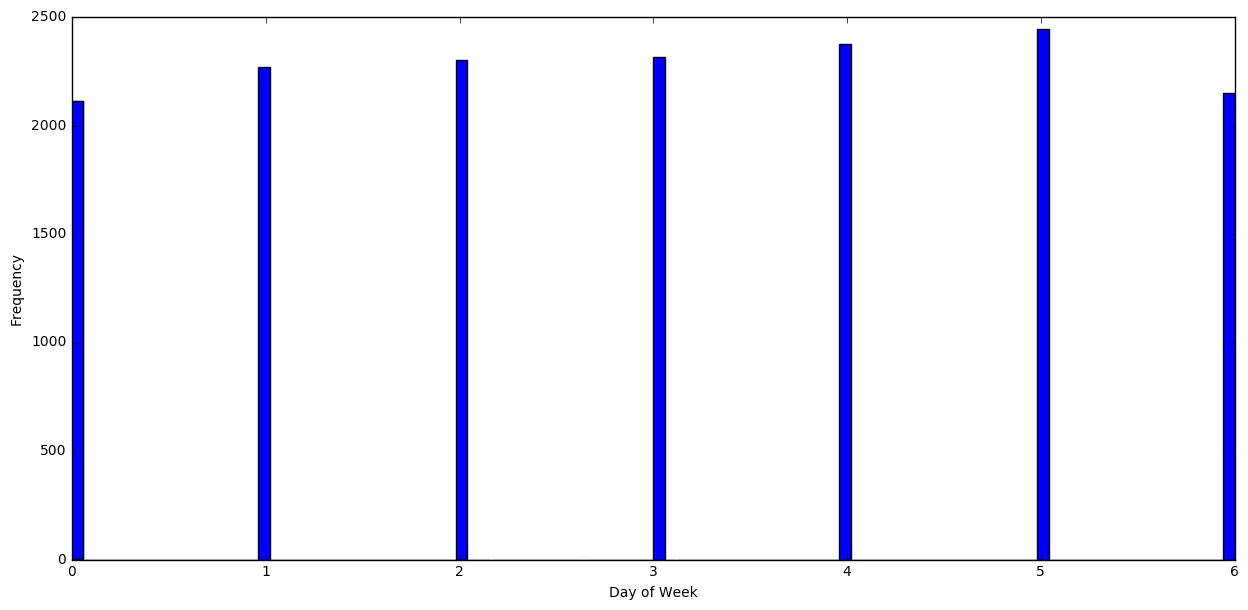

In [71]:
plt.figure(figsize=(15,7))
plt.hist(train['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show() 

In [72]:
# yes, 4th and 5th days of week has most affect the fare and almost all days at high levelof fare of cab ride.

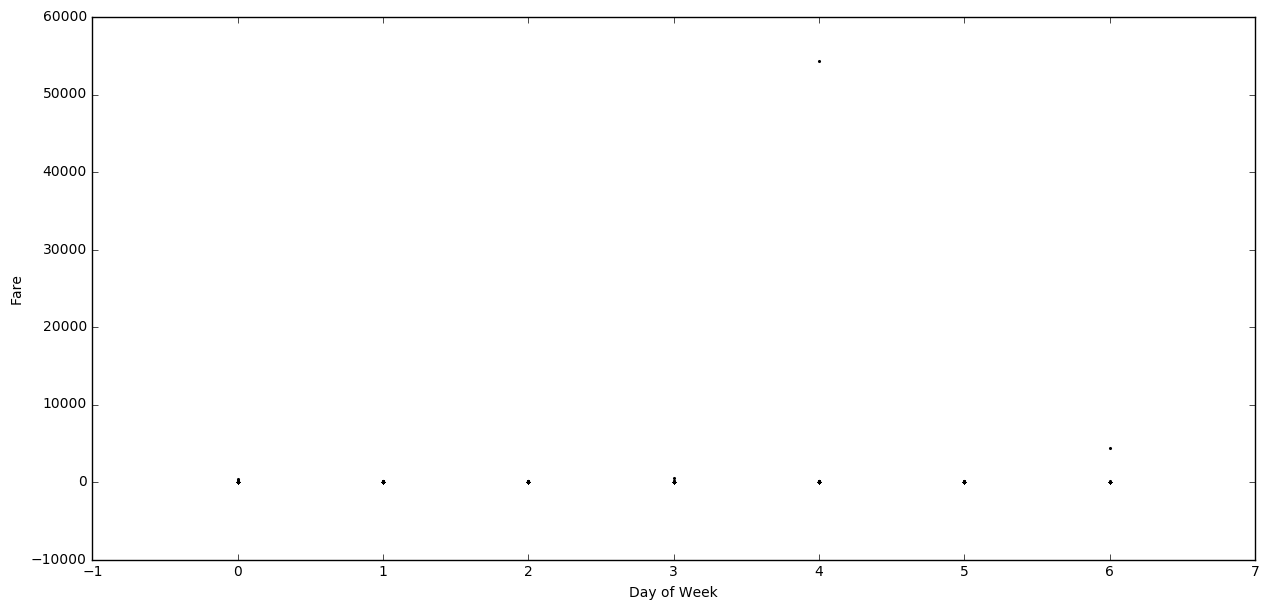

In [73]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day of Week'], y=train['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare') 
plt.show()

In [74]:
# The highest fares seem to be on a Thursday and the lowest on sunday and wednesday.
# Maybe people want to stay at home in sunday due to holiday and high rush in thursday.

In [75]:
# 4. Does the distance affect the fare?
#This is a no-brainer. I am confident that the distance would affect the fare a great deal. But I will visualise it.

# Firstly, let's check the frequency of the distances that we calculated using Haversine formula. I will do so by creating bins (0-10 kms, 10-20 kms, and so on, and check for any outliers)

In [76]:
train.sort_values(['H_Distance','fare_amount'], ascending=False)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
9147,8.50,2014-07-14 21:37:29,0.000000,0.000000,-74.002037,40.752035,1,8667.542104,2014,7,14,0,21
8647,21.50,2014-03-27 18:01:00,-74.001808,40.750782,0.000000,0.000000,1,8667.497512,2014,3,27,3,18
2397,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,2012,6,24,6,17
472,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,2009,2,22,6,22
15919,16.50,2011-10-17 08:58:54,0.000000,0.000000,-73.999700,40.734500,0,8666.989922,2011,10,17,0,8
11653,16.00,2015-03-04 16:06:28,0.000000,0.000000,-73.985329,40.778534,1,8666.701504,2015,3,4,2,16
14308,8.10,2011-11-11 12:03:38,0.000000,0.000000,-73.990000,40.755400,0,8666.614377,2011,11,11,4,12
13340,18.50,2014-03-31 12:34:47,0.000000,0.000000,-73.997643,40.724432,1,8666.613646,2014,3,31,0,12
10215,13.30,2011-03-18 09:33:41,0.000000,0.000000,-73.990138,40.753392,1,8666.584706,2011,3,18,4,9
4597,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,8666.566030,2010,3,30,1,7


In [77]:
len(train)

15964

In [78]:
bins_0 = train.loc[(train['H_Distance'] == 0), ['H_Distance']]
bins_1 = train.loc[(train['H_Distance'] > 0) & (train['H_Distance'] <= 10),['H_Distance']]
bins_2 = train.loc[(train['H_Distance'] > 10) & (train['H_Distance'] <= 50),['H_Distance']]
bins_3 = train.loc[(train['H_Distance'] > 50) & (train['H_Distance'] <= 100),['H_Distance']]
bins_4 = train.loc[(train['H_Distance'] > 100) & (train['H_Distance'] <= 200),['H_Distance']]
bins_5 = train.loc[(train['H_Distance'] > 200) & (train['H_Distance'] <= 300),['H_Distance']]
bins_6 = train.loc[(train['H_Distance'] > 300),['H_Distance']]
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'
dist_bins =pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])
#len(dist_bins)
dist_bins.columns

Index(['H_Distance', 'bins'], dtype='object')

In [79]:
Counter(dist_bins['bins'])

Counter({'0': 455,
         '0-10': 14667,
         '100-200': 5,
         '11-50': 806,
         '51-100': 6,
         '>300': 25})

In [80]:
# There are values which are greater than 300 kms! In city I am not sure why people would take cabs to travel more than a 300 kms. Since the number of bins for 100-300 kms is quite high, I will keep these. These outliers could be because of types or missing values in the latitude or longitude. 
#Remove fields of the following -
 
# 1.Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is 0
# 2.vice versa of point 1.
# 3.Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is NOT 0. Here I will have to impute the distance values in both the train and test data.

In [81]:
#pickup latitude and longitude = 0
train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [82]:
train = train.drop(train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)].index, axis=0) 

In [83]:
# no outliers found in latitude and longitude..

In [105]:
#Check in test data
test.loc[((test['pickup_latitude']==0) & (test['pickup_longitude']==0))&((test['dropoff_latitude']!=0) & (test['dropoff_longitude']!=0))]

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [85]:
# again no outliers found in latitude and longitude..

In [86]:
# dropoff latitude and longitude = 0
train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [87]:
#Checking test data
#Again no records! AWESOME!
test.loc[((test['pickup_latitude']!=0) & (test['pickup_longitude']!=0))&((test['dropoff_latitude']==0) & (test['dropoff_longitude']==0))]

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [88]:
# Check the H_Distance fields which are greater than 300 kms cause there is no way that people would travel more than 300 kms at the most in city in a CAB!

In [89]:
high_distance = train.loc[(train['H_Distance']>300)&(train['fare_amount']!=0)]

In [90]:
high_distance

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
472,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,2009,2,22,6,22
1260,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,8665.268588,2011,3,10,3,20
2280,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,6026.494216,2011,8,29,0,8
2397,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,2012,6,24,6,17
4278,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,8665.223767,2015,4,7,1,23
4597,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,8666.566030,2010,3,30,1,7
5864,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,5420.988959,2012,3,4,6,1
6188,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,8664.191488,2014,7,28,0,15
6302,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,8663.039123,2015,2,27,4,16
7014,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,4447.086698,2011,6,18,5,4


In [91]:
# 25 rows!  I do not wish to drop them as they contain crucial data. Instead, I will replace the initial distance values with distance values calculated using the fare using the following formula

# distance = (fare_amount - 2.5)/1.56

In [92]:
high_distance.shape

(25, 13)

In [93]:
high_distance['H_Distance'] = high_distance.apply(
    lambda row: (row['fare_amount'] - 2.50)/1.56,
    axis=1
) 

C:\Users\Asus\Anaconda4\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [94]:
#The distance values have been replaced by the newly calculated ones according to the fare
high_distance 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
472,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,0.000000,2009,2,22,6,22
1260,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,2.051282,2011,3,10,3,20
2280,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,4.102564,2011,8,29,0,8
2397,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,27.243590,2012,6,24,6,17
4278,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,2.884615,2015,4,7,1,23
4597,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,2.820513,2010,3,30,1,7
5864,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,3.846154,2012,3,4,6,1
6188,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,8.333333,2014,7,28,0,15
6302,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,8.974359,2015,2,27,4,16
7014,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,1.282051,2011,6,18,5,4


In [95]:
#sync the train data with the newly computed distance values from high_distance dataframe
train.update(high_distance) 

In [96]:
train.shape

(15964, 13)

In [97]:
# Now we shall check for rows where the distance values are 0

In [98]:
train[train['H_Distance']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
11,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
105,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0
191,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0,2014.0,1.0,8.0,2.0,21.0
192,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2010.0,9.0,5.0,6.0,17.0
270,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0,2012.0,8.0,25.0,5.0,1.0
273,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2009.0,10.0,30.0,4.0,18.0
290,6.90,2009-12-14 12:33:00,-73.982432,40.745747,-73.982432,40.745747,1.0,0.0,2009.0,12.0,14.0,0.0,12.0
357,8.50,2013-07-04 16:41:27,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,7.0,4.0,3.0,16.0


In [100]:
# We can see a few rows with distance =0. This could be due to 2 reasons

#The cab waited the whole time and the passenger eventually cancelled. That's why the pickup and drop co-ordinates are the same and maybe, the passenger was charged for the waiting time.
#The pickup and drop co-ordinates were not entered. In other words, these are missing values!
# We need to impute these missing values. I have a plan. I intend to impute the missing distance values with the fare and average price per kilometer of NYC cabs.

# A quick Google search gave me the following prices -

# $$2.5 base-price + $1.56/km --> 6AM to 8PM Mon-Fri

# $$3.0 base-price + $1.56/km --> 8PM to 6AM Mon-Fri and Sat&Sun

# However, before we proceed with the above steps, lets check for the following scenarios to impute the missing fare amount and the H_Distance in train data.

In [ ]:
# SCENARIO 1

#  Distance are 0. According to the table above, we shall delete them as they do not provide us any info with regards to the data.

In [115]:
train[(train['H_Distance']==0)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
11,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
105,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0
191,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0,2014.0,1.0,8.0,2.0,21.0
192,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2010.0,9.0,5.0,6.0,17.0
270,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0,2012.0,8.0,25.0,5.0,1.0
273,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2009.0,10.0,30.0,4.0,18.0
290,6.90,2009-12-14 12:33:00,-73.982432,40.745747,-73.982432,40.745747,1.0,0.0,2009.0,12.0,14.0,0.0,12.0
357,8.50,2013-07-04 16:41:27,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,7.0,4.0,3.0,16.0


In [116]:
# There are 458 rows. There 458 rows do not help us in anyway as we do not know the distance to impute the missing values. So we shall drop them

In [117]:
train = train.drop(train[(train['H_Distance']==0)].index, axis = 0)

In [118]:
#458 rows dropped
train[(train['H_Distance']==0)].shape 

(0, 13)

In [103]:
# SCENARIO 2

# Fare is not 0 and is less than the base amount, but Distance is 0. 

# Delete these rows as the minimum is $2.50, and these fares are incorrect values.

In [123]:
#Between 3pm and 8pm on Mon-Fri
rush_hour = train.loc[(((train['Hour']>=15)&(train['Hour']<=22)) & ((train['Day of Week']>=1) & (train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 2.5))]
rush_hour

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [130]:
#Between 15PM and 22PM on Mon-Fri
non_rush_hour = train.loc[(((train['Hour']<22)|(train['Hour']>15)) & ((train['Day of Week']>=1)&(train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.0))]

non_rush_hour
#keep these. Since the fare_amount is not <2.5 (which is the base fare), these values seem legit to me.

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [131]:
#Saturday and Sunday all hours
weekends = train.loc[((train['Day of Week']==0) | (train['Day of Week']==6)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.0)]
weekends
Counter(weekends['Day of Week'])
#keep these too. Since the fare_amount is not <2.5, these values seem legit to me.

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [133]:
 # From scenario 2, I can understand that the distance is 0, but the fare is all the minimum fare of $2.5. This could be because the passenger booked the cab but ended up cancelling to pay the base fare

In [134]:
# SCENARIO 3

# Fare is 0, but Distance is not 0. These values need to be imputed.

#I can calculate the fare as I have the distance. I shall use the following formula

# fare = 2.5 + 1.56(H_Distance) 

In [135]:
train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)] 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
10002,0.0,2010-02-15 14:26:01,-73.987115,40.738808,-74.005911,40.71396,1.0,3.184763,2010.0,2.0,15.0,0.0,14.0


In [136]:
scenario_3 = train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)] 

In [137]:
len(scenario_3) 

1

In [138]:
#We do not have any distance values that are outliers.
scenario_3.sort_values('H_Distance', ascending=False) 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
10002,0.0,2010-02-15 14:26:01,-73.987115,40.738808,-74.005911,40.71396,1.0,3.184763,2010.0,2.0,15.0,0.0,14.0


In [139]:
scenario_3['fare_amount'] = scenario_3.apply(
    lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1
)

C:\Users\Asus\Anaconda4\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [140]:
scenario_3['fare_amount'] 

10002    7.46823
Name: fare_amount, dtype: float64

In [141]:
train.update(scenario_3) 

In [142]:
train.shape 

(15506, 13)

In [158]:
# PART 2 --> MODELLING AND PREDICTION

 # FINALLY! Data cleansing is done! Now to split the x and y variables and proceed to modelling. I shall use the random forest method for prediction

In [159]:
train.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'Year', 'Month', 'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [160]:
test.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'Year', 'Month', 'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [162]:
#not including the pickup_datetime columns as datetime columns cannot be directly used while modelling. Features need to extracted from the 
#timestamp fields which will later be used as features for modelling.
train = train.drop(['pickup_datetime'], axis = 1)
test = test.drop(['pickup_datetime'], axis = 1) 

In [164]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'Year', 'Month', 'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [165]:
test.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'H_Distance', 'Year', 'Month',
       'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [166]:
x_train = train.iloc[:,train.columns!='fare_amount']
y_train = train['fare_amount'].values
x_test = test 

In [167]:
x_train.shape

(15506, 11)

In [168]:
x_train.columns 

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'H_Distance', 'Year', 'Month',
       'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [169]:
y_train.shape

(15506,)

In [170]:
x_test.shape

(9914, 11)

In [171]:
x_test.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'H_Distance', 'Year', 'Month',
       'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [200]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test) 

In [ ]:
 #################################### And that's a wrap! ##############################################